# Support Vector Regression (SVR)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('/datalab/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
bprint(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y = y.reshape(len(y),1)

In [ ]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_x= StandardScaler()

In [ ]:
X = sc_x.fit_transform(X)

In [ ]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
sc_y=StandardScaler()
y=sc_y.fit_transform(y)

In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR

In [ ]:
regressor = SVR(kernel='rbf')

In [ ]:
svr_fit=regressor.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Predicting a new result

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

Text(0, 0.5, 'Salary')

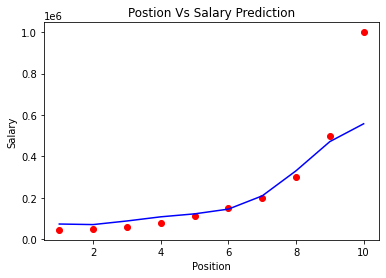

In [ ]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(svr_fit.predict(X)),color='blue')
plt.title('Postion Vs Salary Prediction')
plt.xlabel('Position')
plt.ylabel('Salary')

## Visualising the SVR results (for higher resolution and smoother curve)

Text(0, 0.5, 'Salary')

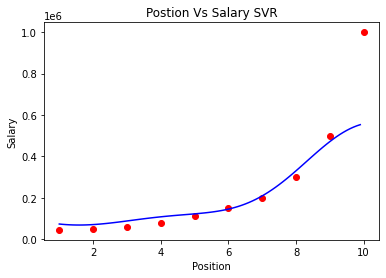

In [ ]:
X_grid = np.arange(min(sc_x.inverse_transform(X)),max(sc_x.inverse_transform(X)),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(X_grid,sc_y.inverse_transform(svr_fit.predict(sc_x.transform(X_grid))),color='blue')
plt.title('Postion Vs Salary SVR')
plt.xlabel('Position')
plt.ylabel('Salary')